In [1]:
import numpy as np 
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max.columns',None)
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("desktop/crime_in_la.csv")
df.head()

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,08/01/2020,22:30,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,01/01/2020,03:30,1,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,191501505,01/01/2020,17:30,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
3,191921269,01/01/2020,04:15,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,BEAUTY SUPPLY STORE,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468
4,200100501,01/01/2020,00:30,1,Central,163,121,"RAPE, FORCIBLE",0413 1822 1262 1415,25,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S BROADWAY,34.0452,-118.2534


In [4]:
df.shape

(418609, 20)

In [5]:
df.describe()

,DR_NO,AREA,Rpt Dist No,Crm Cd,Vict Age,Weapon Used Cd,LAT,LON
count,4.186090e+05,418609.000000,418609.000000,418609.000000,418609.000000,418609.000000,418609.000000,418609.000000
mean,2.069560e+08,10.785924,1124.832892,506.620849,29.949722,450.000554,33.885863,-117.704073
std,5.807089e+06,6.053422,605.425720,209.646163,21.731755,99.824408,2.521733,8.751318
min,8.170000e+02,1.000000,101.000000,110.000000,-1.000000,101.000000,0.000000,-118.667600
25%,2.012154e+08,6.000000,629.000000,330.000000,10.000000,400.000000,34.010600,-118.430100
50%,2.102116e+08,11.000000,1147.000000,480.000000,31.000000,500.000000,34.058100,-118.322400
75%,2.113045e+08,16.000000,1621.000000,626.000000,45.000000,500.000000,34.163100,-118.274100
max,2.299050e+08,21.000000,2199.000000,956.000000,120.000000,516.000000,34.334300,0.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418609 entries, 0 to 418608
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           418609 non-null  int64  
 1   DATE OCC        418609 non-null  object 
 2   TIME OCC        418609 non-null  object 
 3   AREA            418609 non-null  int64  
 4   AREA NAME       418609 non-null  object 
 5   Rpt Dist No     418609 non-null  int64  
 6   Crm Cd          418609 non-null  int64  
 7   Crm Cd Desc     418609 non-null  object 
 8   Mocodes         418609 non-null  object 
 9   Vict Age        418609 non-null  int64  
 10  Vict Sex        418609 non-null  object 
 11  Vict Descent    418609 non-null  object 
 12  Premis Desc     418451 non-null  object 
 13  Weapon Used Cd  418609 non-null  float64
 14  Weapon Desc     418609 non-null  object 
 15  Status          418609 non-null  object 
 16  Status Desc     418609 non-null  object 
 17  LOCATION  

In [7]:
missing_features=[features for features in df.columns if df[features].isnull().sum()>=1]
len(missing_features)

1

In [8]:
for features in missing_features:
    print(features,'has :',np.round((df[features].isnull().mean())*100,4),'% missing Values')

Premis Desc has : 0.0377 % missing Values


In [9]:
df.corr()['Vict Age'].sort_values(ascending=False)

Vict Age          1.000000
AREA              0.011202
Rpt Dist No       0.011127
LON               0.001138
LAT              -0.000288
DR_NO            -0.000390
Crm Cd           -0.008582
Weapon Used Cd   -0.073887
Name: Vict Age, dtype: float64

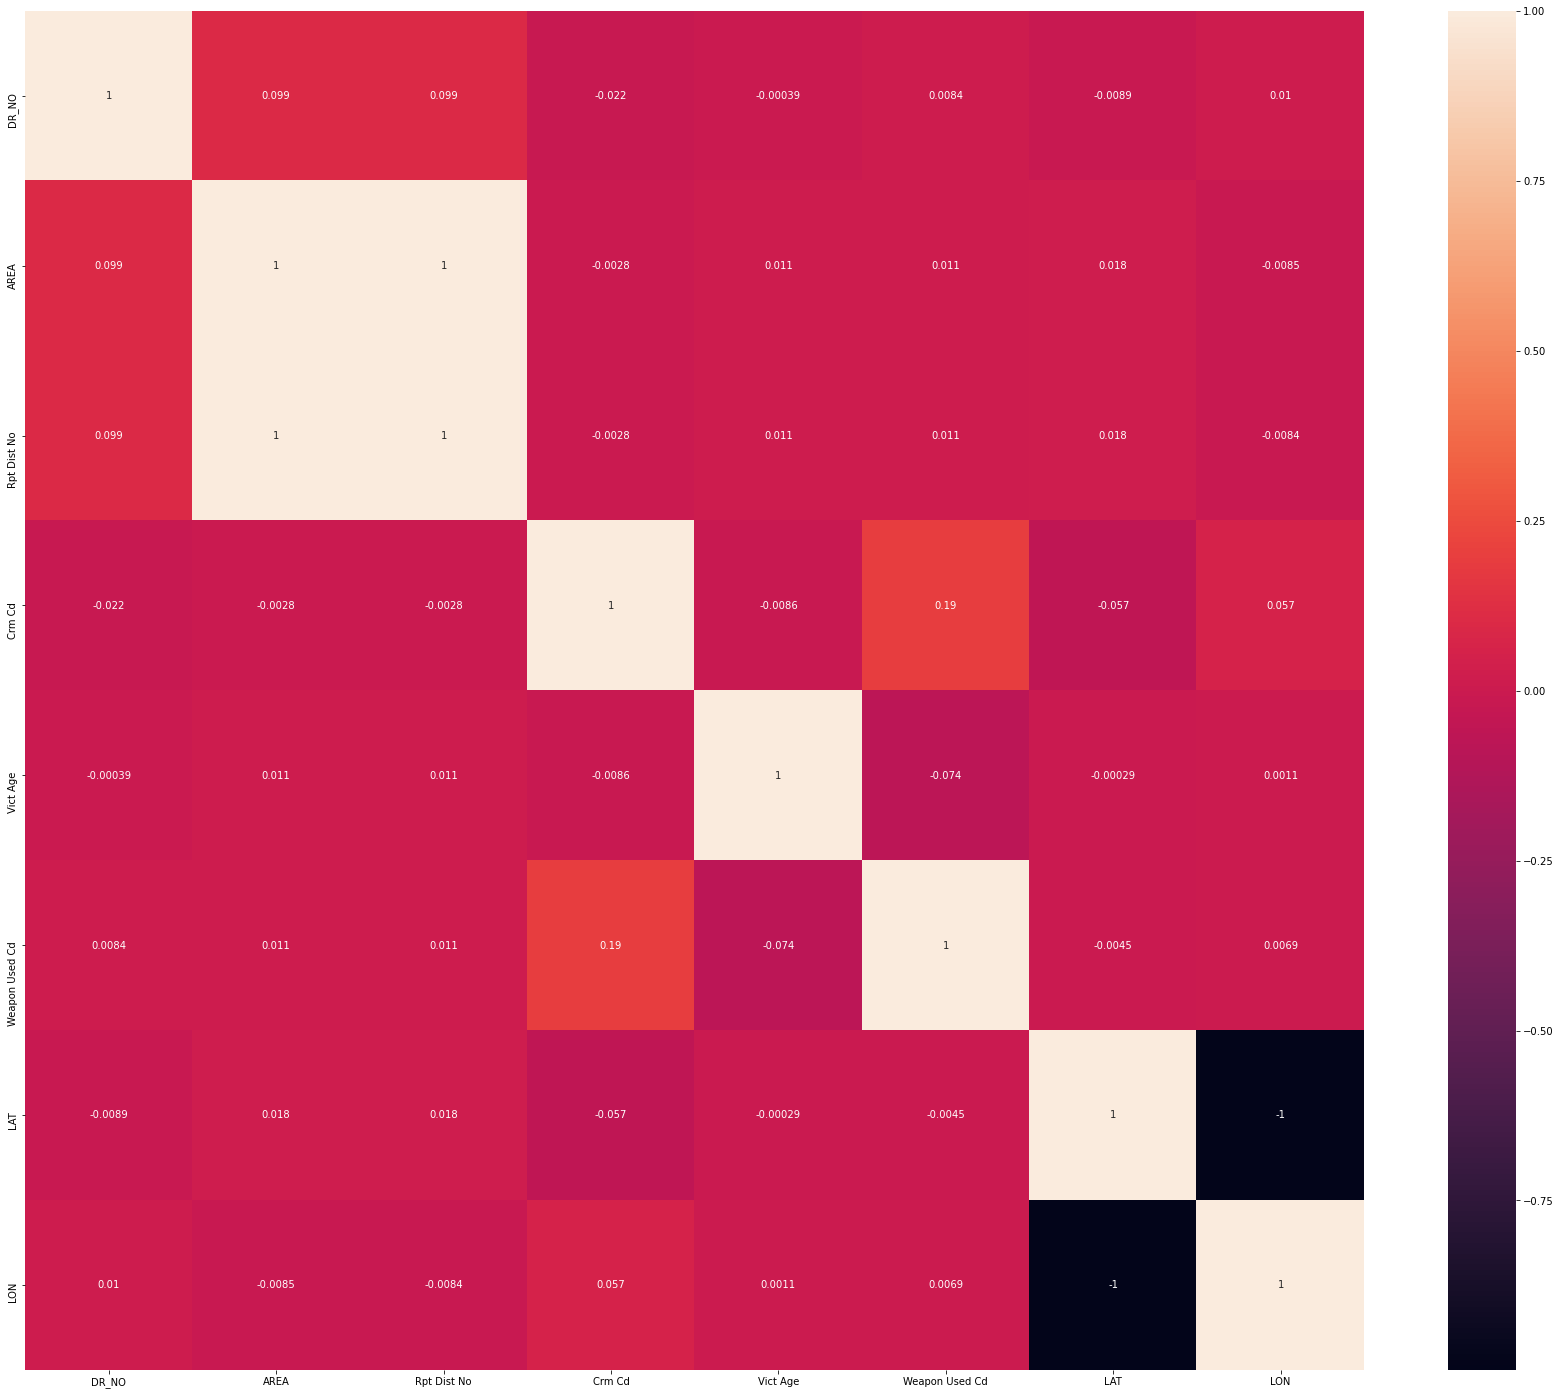

In [10]:
f, ax = plt.subplots(figsize=(30, 25))
sns.heatmap(df.corr(),annot = True);

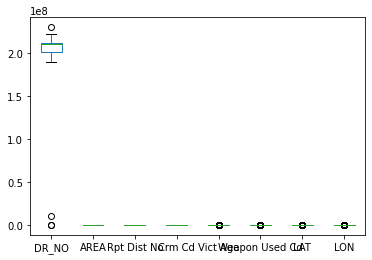

In [11]:
df.plot.box();

In [12]:
numerical_features = [features for features in df.columns if df[features].dtype !='O' and features!='Id']
numerical_features

['DR_NO',
 'AREA',
 'Rpt Dist No',
 'Crm Cd',
 'Vict Age',
 'Weapon Used Cd',
 'LAT',
 'LON']

In [13]:
year_feature = [features for features in numerical_features if 'Yr' in features or 'Year' in features]
year_feature

[]

In [14]:
discrete_features = [features for features in numerical_features if(len(df[features].unique())<25) and features not in year_feature]
discrete_features

['AREA']

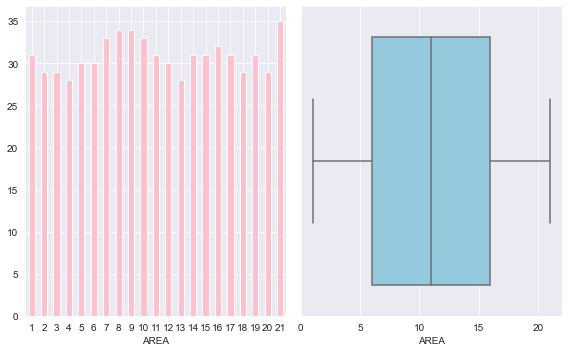

In [15]:
sns.set_style('darkgrid')
fig=plt.figure(figsize=(8,5))

a=len(discrete_features)   
b=2                        
c=1                        

data=df.copy()  

for features in discrete_features:
    plt.subplot(a,b,c)
    data.groupby(features)['Vict Age'].median().plot(kind='bar',color='pink')
    plt.xticks(rotation=0)  
    c = c + 1 
    
    plt.subplot(a,b,c)
    sns.boxplot(x = data[features], color = 'skyblue')  
    c = c + 1  
     

fig.tight_layout()
plt.show()

In [16]:
continious_features = [features for features in numerical_features if features not in discrete_features + year_feature + ['Id']]
continious_features

['DR_NO', 'Rpt Dist No', 'Crm Cd', 'Vict Age', 'Weapon Used Cd', 'LAT', 'LON']

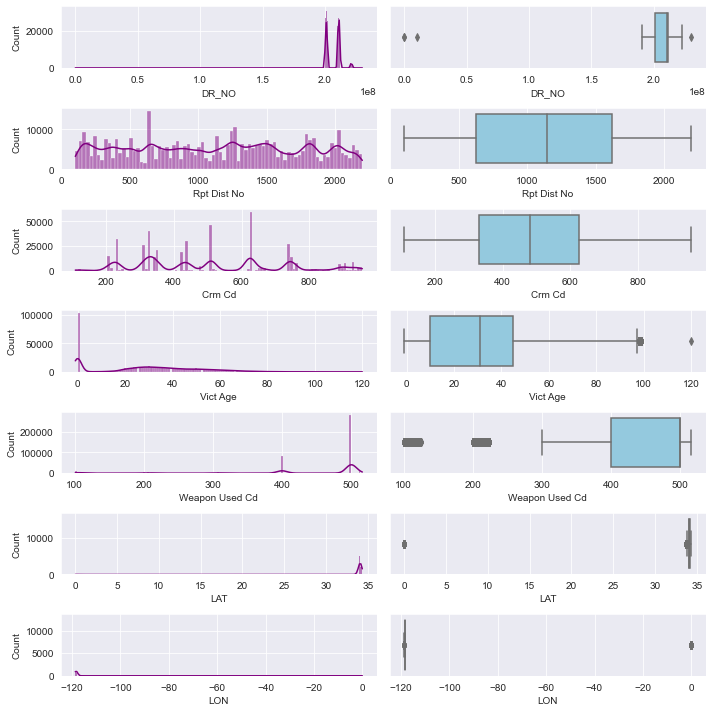

In [17]:
sns.set_style('darkgrid')
fig=plt.figure(figsize=(10,10))

a=len(continious_features)   
b=2                        
c=1                       

data=df.copy()  

for features in continious_features:
    plt.subplot(a,b,c)
    sns.histplot(x = data[features], kde = True , color = 'purple')
    c = c + 1 
    
    plt.subplot(a,b,c)
    sns.boxplot(x = data[features], color = 'skyblue') 
    c = c + 1  
     

fig.tight_layout()
plt.show()

In [18]:
categorical_features = [features for features in df.columns if df[features].dtype == 'O']
categorical_features

['DATE OCC',
 'TIME OCC',
 'AREA NAME',
 'Crm Cd Desc',
 'Mocodes',
 'Vict Sex',
 'Vict Descent',
 'Premis Desc',
 'Weapon Desc',
 'Status',
 'Status Desc',
 'LOCATION']

In [19]:
df[categorical_features].head()

,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Mocodes,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status,Status Desc,LOCATION
0,08/01/2020,22:30,Southwest,BATTERY - SIMPLE ASSAULT,0444 0913,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL
1,01/01/2020,03:30,Central,BATTERY - SIMPLE ASSAULT,0416 1822 1414,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST
2,01/01/2020,17:30,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,5400 CORTEEN PL
3,01/01/2020,04:15,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,X,X,BEAUTY SUPPLY STORE,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14400 TITUS ST
4,01/01/2020,00:30,Central,"RAPE, FORCIBLE",0413 1822 1262 1415,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S BROADWAY


In [ ]:
sns.set_style('darkgrid')
fig=plt.figure(figsize=(10,10))

a=len(categorical_features)   
b=2                           
c=1                           

data=df.copy()  

for features in categorical_features:
    plt.subplot(a,b,c)
  
    data.groupby(features)['Vict Age'].median().plot(color='skyblue',kind='bar')
    plt.xticks(rotation=0)
    c = c+1

fig.tight_layout()
plt.show()

In [ ]:
for features in categorical_features:
    print('There are {} subclasses in {}'.format(len(df[features].unique()),features))